The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module

## Q1. Downloading the data

We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "For-Hire Vehicle Trip Records".

Download the data for January and February 2021.

Note that you need "For-Hire Vehicle Trip Records", not "High Volume For-Hire Vehicle Trip Records".

Read the data for January. How many records are there?

    1054112
    1154112
    1254112
    1354112


In [19]:
#!wget -P ./data https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-01.parquet
#!wget -P ./data https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-02.parquet

In [20]:
# temp cell of installing neccesary moduls
#!pip install matplotlib

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data_01 = pd.read_parquet("./data/fhv_tripdata_2021-01.parquet")
data_02 = pd.read_parquet("./data/fhv_tripdata_2021-02.parquet")

In [23]:
data_01.sample(10)

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
154359,B01800,2021-01-05 19:00:00,2021-01-05 19:50:00,NaN,NaN,None,B01800
85326,B01482,2021-01-04 08:55:00,2021-01-04 09:02:00,NaN,NaN,None,B01482
388514,B03016,2021-01-12 06:29:40,2021-01-12 06:48:55,NaN,182.0,None,B02869
108823,B01710,2021-01-04 16:54:35,2021-01-04 18:20:16,NaN,NaN,None,B01710
372629,B01239,2021-01-11 15:02:55,2021-01-11 15:10:49,NaN,81.0,None,B01239
377871,B02728,2021-01-11 17:51:49,2021-01-11 18:07:20,NaN,250.0,None,B02728
514230,B01145,2021-01-15 05:21:30,2021-01-15 05:32:00,NaN,248.0,None,B02971
88837,B01726,2021-01-04 09:35:38,2021-01-04 09:46:17,NaN,241.0,None,B01726
236270,B01455,2021-01-07 18:17:31,2021-01-07 18:32:36,NaN,171.0,None,B03290
86019,B02550,2021-01-04 08:43:45,2021-01-04 08:55:23,NaN,56.0,None,B02550


In [24]:
print(f"The number of records in January is: {data_01.shape[0]}")

The number of records in January is: 1154112


## Q2. Computing duration

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the average trip duration in January?

    15.16
    19.16
    24.16
    29.16


In [25]:
#for this task, we will create separate columng for duration
data_01["duration"] =  round((data_01["dropOff_datetime"] - data_01["pickup_datetime"]).dt.total_seconds()/60, 2)
print(f"The average trip duration in January is: {round(data_01['duration'].mean(), 2)}")

The average trip duration in January is: 19.17


In [26]:
#to see the generated column
data_01.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.00
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.00
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.00
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.28
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.22


## Data preparation

Check the distribution of the duration variable. There are some outliers.

Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

How many records did you drop?

{'whiskers': [<matplotlib.lines.Line2D at 0x219ef891a90>,
 'caps': [<matplotlib.lines.Line2D at 0x219ef8ee3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x219e7013710>],
 'medians': [<matplotlib.lines.Line2D at 0x219ef8efa10>],
 'fliers': [<matplotlib.lines.Line2D at 0x219ef8d9090>],
 'means': []}

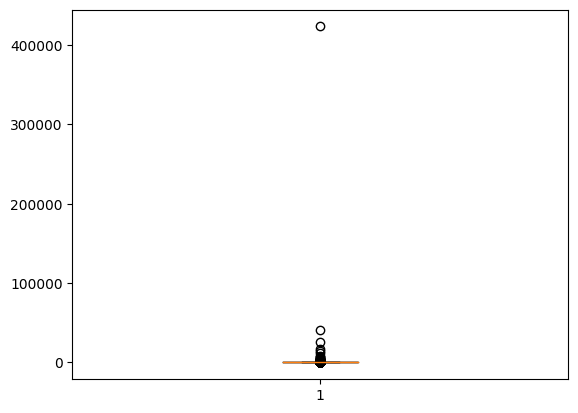

In [27]:
plt.boxplot(data_01['duration'])

In [28]:
data_01_no_outliers = data_01[(data_01['duration'] >= 1) & (data_01['duration'] <= 60)].copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x219ef94a950>,
 'caps': [<matplotlib.lines.Line2D at 0x219ef94be90>,
 'boxes': [<matplotlib.lines.Line2D at 0x219ef949c10>],
 'medians': [<matplotlib.lines.Line2D at 0x219ef961550>],
 'fliers': [<matplotlib.lines.Line2D at 0x219ef8cff10>],
 'means': []}

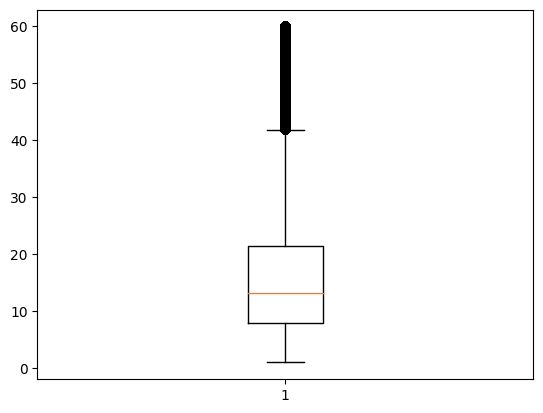

In [29]:
plt.boxplot(data_01_no_outliers['duration'])

In [30]:
print(f"The number of dropped records: {data_01['duration'].shape[0] - data_01_no_outliers['duration'].shape[0]}")

The number of dropped records: 44286


## Q3. Missing values

The features we'll use for our model are the pickup and dropoff location IDs.

But they have a lot of missing values there. Let's replace them with "-1".

What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.

    53%
    63%
    73%
    83%


In [31]:
data_01_no_outliers['PUlocationID'].fillna(-1, inplace=True)

In [35]:
percent_missing = data_01_no_outliers['PUlocationID'].isin([-1]).sum() * 100 / len(data_01_no_outliers['PUlocationID'])
print(f"The fractions of missing values for the pickup location ID: {round(percent_missing, 0)}")

The fractions of missing values for the pickup location ID: 84.0


In [ ]:
data_01_no_outliers['DOlocationID'].fillna(-1, inplace=True)
